In [179]:
import importance as importance
import pandas as pandas

train_data = pandas.read_csv("datasets/train.csv")
test_data = pandas.read_csv("datasets/test.csv")

In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [182]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:
train_data.drop(['Loan_ID'], axis=1, inplace = True)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
train_data.dropna(axis = 0, inplace = True)

In [185]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [186]:
train_data['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [187]:
train_data.replace(to_replace = "Male", value = 0, inplace = True)
train_data.replace(to_replace = "Female", value = 1, inplace = True)

train_data['Gender'].value_counts()

Gender
0    394
1     86
Name: count, dtype: int64

In [188]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [189]:
train_data['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [190]:
train_data.replace(to_replace = "No", value = 0, inplace = True)
train_data.replace(to_replace = "Yes", value = 1, inplace = True)

train_data['Married'].value_counts()

Married
1    311
0    169
Name: count, dtype: int64

In [191]:
train_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [192]:
train_data.replace(to_replace = "3+", value = 3, inplace = True)

train_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [193]:
train_data['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [194]:
train_data.replace(to_replace = "Not Graduate", value = 0, inplace = True)
train_data.replace(to_replace = "Graduate", value = 1, inplace = True)

train_data['Education'].value_counts()

Education
1    383
0     97
Name: count, dtype: int64

In [195]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [196]:
train_data['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [214]:
train_data.replace(to_replace = "Rural", value = 0, inplace = True)
train_data.replace(to_replace = "Semiurban", value = 1, inplace = True)
train_data.replace(to_replace = "Urban", value = 2, inplace = True)

train_data['Property_Area'].value_counts()

Property_Area
1    191
2    150
0    139
Name: count, dtype: int64

In [198]:
train_data['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [199]:
train_data.replace(to_replace = "N", value = 0, inplace = True)
train_data.replace(to_replace = "Y", value = 1, inplace = True)

train_data['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [200]:
train_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,0,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


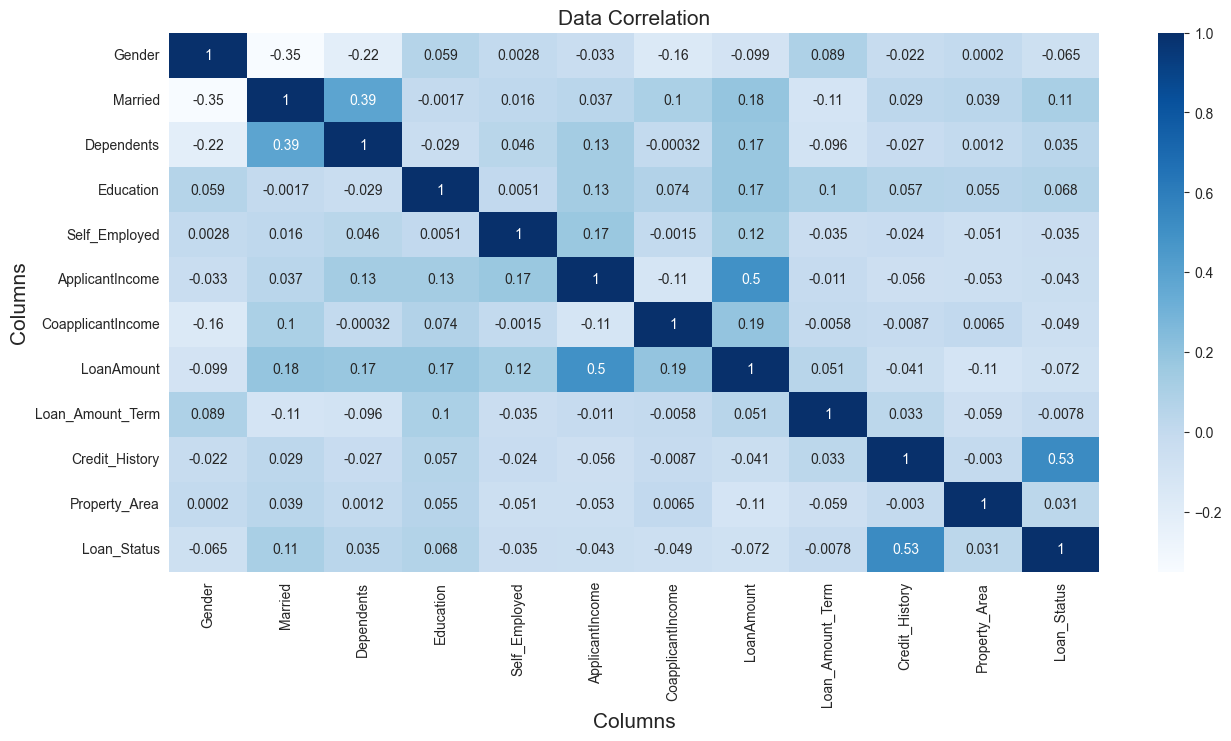

In [215]:
import matplotlib.pyplot as mplt
import seaborn as sns

mplt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(),annot=True,cmap="Blues")
mplt.title("Data Correlation",size=15)
mplt.ylabel("Columns",size=15)
mplt.xlabel("Columns",size=15)
mplt.show()

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = train_data.drop(labels = 'Loan_Status', axis = 1).values
y = train_data['Loan_Status'].values



x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.30, random_state =86)


log_reg = LogisticRegression(random_state=86)
log_reg.fit(x_train, y_train)

log_reg.score(x_train , y_train)

0.8184523809523809

In [217]:
log_reg.score(x_test , y_test)

0.7986111111111112

In [218]:
from sklearn import metrics

y_pred = log_reg.predict(x_test)

metrics.accuracy_score(y_pred, y_test)

0.7986111111111112

In [219]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19, 28],
       [ 1, 96]], dtype=int64)

In [220]:
train_data.shape

(480, 12)

In [221]:
rand_forest = RandomForestClassifier(max_depth=12,max_features=12)
rand_forest.fit(x_train, y_train)
rand_forest.score(x_train,y_train)

1.0

In [208]:
rand_forest.score(x_test, y_test)

0.7986111111111112

In [209]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.7559523809523809

In [210]:
knn.score(x_test, y_test)

0.6388888888888888

In [211]:
dec_tree = DecisionTreeClassifier(max_depth=12, max_features=12)
dec_tree.fit(x_train, y_train)
dec_tree.score(x_train, y_train)

0.9732142857142857

Feature: 0, Score: 0.01191
Feature: 1, Score: 0.02400
Feature: 2, Score: 0.07039
Feature: 3, Score: 0.00794
Feature: 4, Score: 0.01452
Feature: 5, Score: 0.22228
Feature: 6, Score: 0.13894
Feature: 7, Score: 0.12423
Feature: 8, Score: 0.04486
Feature: 9, Score: 0.31325
Feature: 10, Score: 0.02767


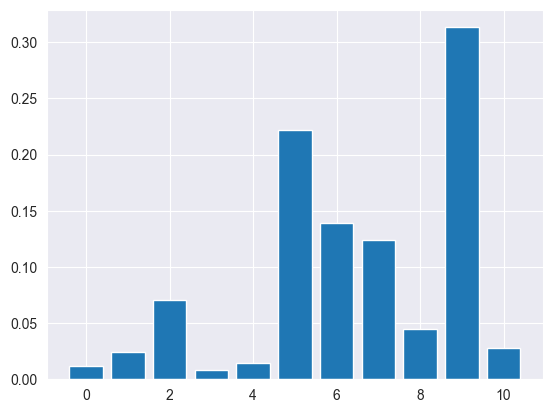

In [224]:
dec_tree.score(x_test, y_test)
importance_dec_tree= dec_tree.feature_importances_
for i,v in enumerate(importance_dec_tree):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_dec_tree))], importance_dec_tree)
mplt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
xg.score(x_train, y_train)

In [ ]:
xg.score(x_test, y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_train, y_train)

In [ ]:
lin_reg.score(x_test, y_test)

Feature: 0, Score: -0.06376
Feature: 1, Score: 0.62463
Feature: 2, Score: 0.03917
Feature: 3, Score: 0.25647
Feature: 4, Score: -0.29783
Feature: 5, Score: 0.00001
Feature: 6, Score: -0.00005
Feature: 7, Score: -0.00242
Feature: 8, Score: -0.00413
Feature: 9, Score: 2.61327
Feature: 10, Score: -0.17556


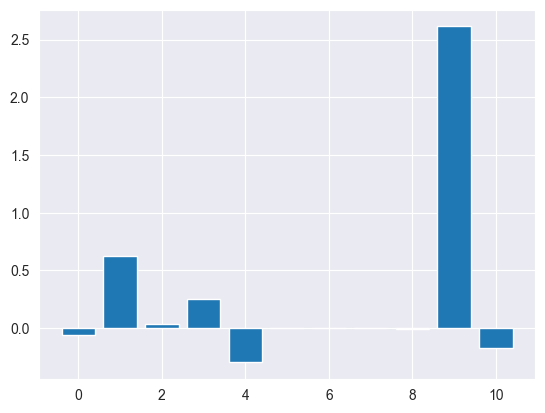

In [225]:
importance = log_reg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance))], importance)
mplt.show()

In [ ]:
train_data.info()

Feature: 0, Score: -0.06376
Feature: 1, Score: 0.62463
Feature: 2, Score: 0.03917
Feature: 3, Score: 0.25647
Feature: 4, Score: -0.29783
Feature: 5, Score: 0.00001
Feature: 6, Score: -0.00005
Feature: 7, Score: -0.00242
Feature: 8, Score: -0.00413
Feature: 9, Score: 2.61327
Feature: 10, Score: -0.17556


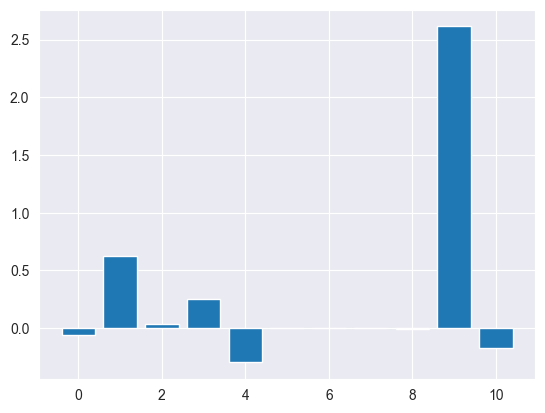

In [226]:
from sklearn.inspection import  permutation_importance
results = permutation_importance(knn, x_train, y_train, scoring='accuracy')
importance_knn = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance))], importance)
mplt.show()

In [ ]:
importance_xg = xg.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance))], importance)
mplt.show()

In [ ]:
train_data_fs = train_data.drop(['Gender','Self_Employed','CoapplicantIncome', 'Loan_Amount_Term', 'Property_Area', 'Loan_Status'], axis=1, inplace = False)

In [ ]:
x_fs = train_data_fs.values
y_fs = train_data['Loan_Status'].values

x_train_fs , x_test_fs , y_train_fs , y_test_fs = train_test_split(x_fs,y_fs, test_size= 0.30, random_state =86)

In [ ]:
log_reg_fs = LogisticRegression()
log_reg_fs.fit(x_train_fs, y_train_fs)
importance_log_reg_fs = log_reg_fs.coef_[0]
for i,v in enumerate(importance_log_reg_fs):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_log_reg_fs))], importance_log_reg_fs)
mplt.show()

In [ ]:
log_reg_fs.score(x_test_fs, y_test_fs)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
y_pred_fs = log_reg_fs.predict(x_test_fs)
print(accuracy_score(y_test_fs, y_pred_fs))
print(precision_score(y_test_fs, y_pred_fs))
print(recall_score(y_test_fs, y_pred_fs))
print(f1_score(y_test_fs, y_pred_fs))

In [ ]:
from sklearn.preprocessing import L